In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests as req
from pprint import pprint
import os, json, csv, time, random, datetime, time 
from config import api_key
from citipy import citipy
import openweathermapy as ow


In [2]:
# Assign the Cities' file to a variable 
cities_file = os.path.join(".", "Resources", "cities.csv")

### Create a list of cities for analysis

In [3]:
# Create lists with the complete latitudes and longitudes to better analysis accuracy. 
lat = [y for y in range (-88, 93, 4)]
lng = [x for x in range (-178, 188, 8)]

# Store the cities in a collection/set. This way we be sure we won't have any duplication.
collection = set()
# Line terminator to append to each city
lineterminator = '\r\n'
# Looping combining Latitudes and Longitudes to get cities 
for y in lat:
    for x in lng:
        # Change the coordinates a bit 
        rand_y = random.uniform( (y-2), (y+2) )
        rand_x = random.uniform( (x-2), (x+2) )
        # Get the nearest city of current latitude and longitude
        city = citipy.nearest_city(rand_y,rand_x)
        collection.add(f"{city.city_name},{city.country_code}{lineterminator}")
#         print(f"City: {city.city_name}, Country:{city.country_code}, coord: {y},{x}")

# Preview total of cities 
print(f"Total of distinct cities: {len(collection)}")

Total of distinct cities: 826


In [4]:
# Save the selected cities in a csv file.
with open(cities_file, 'w') as writeFile:
    # Write the header
    writeFile.write(f"City,Country{lineterminator}")
    # Write the cities
    writeFile.writelines(collection)
        

In [5]:
# Read the cities file
cities = pd.read_csv(cities_file, sep=',') # columns=["city","country"], 
# Convert the selected cities to a DataFrame
df_cities = pd.DataFrame(cities)
# Preview the DataFrame
df_cities.head()


,City,Country
0,port elizabeth,za
1,baraut,in
2,druzhba,uz
3,sept-iles,ca
4,ojitlan,mx


In [6]:
# Create the new fields for city.
df_cities["Cloudiness"] = None
df_cities["Date"] = None
df_cities["Humidity"] = 0
df_cities["Lat"] = 0.0
df_cities["Lng"] = 0.0
df_cities["Max Temp"] = 0.0
df_cities["Wind Speed"] = 0.0

# Set units to get the temperature in fahrenheit
units = "imperial"

# Set the default URL.
url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units={units}"

In [7]:
# Iterate each city to fill new fields. 
count = 0 

print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")       

for index, row in df_cities.iterrows(): 
#     if count == 5:
#         break
    # Add a one second interval between queries to stay within API query limits
    #####################################################
    time.sleep(1) #####################################################
    #####################################################
    count += 1
    # Build query URL and print log
    city_country = f"{row['City']},{row['Country']}" 
    # Append the current city to the URL
    query_url = f"{url}&q={city_country}"
    print(f"Processing Record {count} - ({city_country.replace(',','/')})")
    print(query_url)
    
    try:
        # Run the request
        result = req.get(query_url).json()
        # Fill fields
        df_cities.loc[index, 'Cloudiness'] = result['clouds']['all']
        df_cities.loc[index, 'Date'] = datetime.datetime.fromtimestamp( int(result['dt']) ).strftime('%Y-%m-%d %H:%M:%S')
        df_cities.loc[index, 'Humidity'] = result['main']['humidity']
        df_cities.loc[index, 'Lat'] = result['coord']["lat"]
        df_cities.loc[index, 'Lng'] = result['coord']["lon"]
        df_cities.loc[index, 'Max Temp'] = result['main']['temp_max']
        df_cities.loc[index, 'Wind Speed'] = result['wind']['speed']
    except:    
        print(f"We've got an error when processing city={city_country} - {result}.")
        # Lets remove the current city from DF.
        df_cities.drop([index],inplace=True)

    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")       
        
        
# Remove any City missing data
df_cities.dropna(how="any", inplace=True)  
# Reindex DF
df_cities.reset_index(drop=True, inplace=True)   
# Preview total cities
print(f"Total cities remaining: {len(df_cities)}")


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 - (port elizabeth/za)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=port elizabeth,za
Processing Record 2 - (baraut/in)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=baraut,in
Processing Record 3 - (druzhba/uz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=druzhba,uz
We've got an error when processing city=druzhba,uz - {'cod': '404', 'message': 'city not found'}.
Processing Record 4 - (sept-iles/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sept-iles,ca
Processing Record 5 - (ojitlan/mx)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ojitlan,mx
We've got an error when processing city=ojitlan,mx - {'c

Processing Record 52 - (amberley/nz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=amberley,nz
Processing Record 53 - (aranda de duero/es)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=aranda de duero,es
Processing Record 54 - (hauknes/no)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=hauknes,no
Processing Record 55 - (vokhma/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=vokhma,ru
Processing Record 56 - (sinnamary/gf)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sinnamary,gf
Processing Record 57 - (zhangzhou/cn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=zhangzhou,cn
Processing Record 58 - (avarua/ck)
http://api.openweathermap.org/data/2.5/we

Processing Record 103 - (morehead/pg)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=morehead,pg
Processing Record 104 - (port hedland/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=port hedland,au
Processing Record 105 - (turbat/pk)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=turbat,pk
Processing Record 106 - (urucara/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=urucara,br
Processing Record 107 - (tonantins/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=tonantins,br
Processing Record 108 - (comodoro rivadavia/ar)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=comodoro rivadavia,ar
Processing Record 109 - (kushima/jp)
http://api.openweathe

Processing Record 154 - (maniitsoq/gl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=maniitsoq,gl
Processing Record 155 - (port macquarie/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=port macquarie,au
Processing Record 156 - (sabha/ly)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sabha,ly
Processing Record 157 - (saint-philippe/re)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=saint-philippe,re
Processing Record 158 - (saldanha/za)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=saldanha,za
Processing Record 159 - (nishihara/jp)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=nishihara,jp
Processing Record 160 - (kingston/us)
http://api.openweather

Processing Record 205 - (rajanpur/pk)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=rajanpur,pk
Processing Record 206 - (weligama/lk)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=weligama,lk
Processing Record 207 - (bengkulu/id)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bengkulu,id
We've got an error when processing city=bengkulu,id - {'cod': '404', 'message': 'city not found'}.
Processing Record 208 - (zadar/hr)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=zadar,hr
Processing Record 209 - (palabuhanratu/id)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=palabuhanratu,id
We've got an error when processing city=palabuhanratu,id - {'cod': '404', 'message': 'city not found'}.
Processing Record 210 - (kap

Processing Record 254 - (severobaykalsk/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=severobaykalsk,ru
Processing Record 255 - (henties bay/na)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=henties bay,na
Processing Record 256 - (shiyan/cn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=shiyan,cn
Processing Record 257 - (lebu/cl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=lebu,cl
Processing Record 258 - (kenai/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kenai,us
Processing Record 259 - (clyde river/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=clyde river,ca
Processing Record 260 - (bonthe/sl)
http://api.openweathermap.org/data/2.5/w

Processing Record 303 - (vanimo/pg)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=vanimo,pg
Processing Record 304 - (shelburne/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=shelburne,ca
Processing Record 305 - (barrow/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=barrow,us
Processing Record 306 - (capinzal/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=capinzal,br
Processing Record 307 - (saint-pierre/re)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=saint-pierre,re
Processing Record 308 - (attawapiskat/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=attawapiskat,ca
We've got an error when processing city=attawapiskat,ca - {'cod': '404',

Processing Record 353 - (lakes entrance/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=lakes entrance,au
Processing Record 354 - (betare oya/cm)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=betare oya,cm
Processing Record 355 - (ozernovskiy/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ozernovskiy,ru
Processing Record 356 - (ilhabela/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ilhabela,br
Processing Record 357 - (victoria/sc)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=victoria,sc
Processing Record 358 - (bolungarvik/is)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bolungarvik,is
We've got an error when processing city=bolungarvik,is

Processing Record 404 - (natal/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=natal,br
Processing Record 405 - (paramirim/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=paramirim,br
Processing Record 406 - (gunjur/gm)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=gunjur,gm
Processing Record 407 - (dawlatabad/af)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=dawlatabad,af
Processing Record 408 - (punta arenas/cl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=punta arenas,cl
Processing Record 409 - (bay city/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bay city,us
Processing Record 410 - (cherepovets/ru)
http://api.openweathermap.org/data/2.

Processing Record 454 - (komsomolskiy/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=komsomolskiy,ru
Processing Record 455 - (ishigaki/jp)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ishigaki,jp
Processing Record 456 - (naze/jp)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=naze,jp
Processing Record 457 - (santo tomas/pe)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=santo tomas,pe
Processing Record 458 - (nouadhibou/mr)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=nouadhibou,mr
Processing Record 459 - (raton/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=raton,us
Processing Record 460 - (vestmanna/fo)
http://api.openweathermap.org/data/2.5/

Processing Record 505 - (laurens/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=laurens,us
Processing Record 506 - (jardim/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=jardim,br
Processing Record 507 - (greenville/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=greenville,us
Processing Record 508 - (ahipara/nz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ahipara,nz
Processing Record 509 - (gazli/uz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=gazli,uz
Processing Record 510 - (oktyabrskoye/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=oktyabrskoye,ru
Processing Record 511 - (sambava/mg)
http://api.openweathermap.org/data/2.5/weather?

Processing Record 556 - (kampot/kh)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kampot,kh
Processing Record 557 - (portel/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=portel,br
Processing Record 558 - (xinzhi/cn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=xinzhi,cn
Processing Record 559 - (chiungutwa/tz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=chiungutwa,tz
Processing Record 560 - (thinadhoo/mv)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=thinadhoo,mv
Processing Record 561 - (grand gaube/mu)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=grand gaube,mu
Processing Record 562 - (savelugu/gh)
http://api.openweathermap.org/data/2.5/weath

Processing Record 607 - (constitucion/cl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=constitucion,cl
Processing Record 608 - (waitati/nz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=waitati,nz
Processing Record 609 - (nome/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=nome,us
Processing Record 610 - (loiza/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=loiza,us
We've got an error when processing city=loiza,us - {'cod': '404', 'message': 'city not found'}.
Processing Record 611 - (hambantota/lk)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=hambantota,lk
Processing Record 612 - (darhan/mn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=darh

Processing Record 656 - (noumea/nc)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=noumea,nc
Processing Record 657 - (lata/sb)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=lata,sb
We've got an error when processing city=lata,sb - {'cod': '404', 'message': 'city not found'}.
Processing Record 658 - (kautokeino/no)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kautokeino,no
Processing Record 659 - (diamantino/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=diamantino,br
Processing Record 660 - (palmer/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=palmer,us
Processing Record 661 - (chisinau/md)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=chisina

Processing Record 705 - (goderich/sl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=goderich,sl
We've got an error when processing city=goderich,sl - {'cod': '404', 'message': 'city not found'}.
Processing Record 706 - (new norfolk/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=new norfolk,au
Processing Record 707 - (shkotovo-22/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=shkotovo-22,ru
We've got an error when processing city=shkotovo-22,ru - {'cod': '404', 'message': 'city not found'}.
Processing Record 708 - (dotnuva/lt)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=dotnuva,lt
Processing Record 709 - (rosetta/eg)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=rosetta,eg
Processing Record 710 - (c

Processing Record 753 - (torbay/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=torbay,ca
Processing Record 754 - (biloela/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=biloela,au
Processing Record 755 - (catamarca/ar)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=catamarca,ar
We've got an error when processing city=catamarca,ar - {'cod': '404', 'message': 'city not found'}.
Processing Record 756 - (urbana/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=urbana,us
Processing Record 757 - (ketchikan/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ketchikan,us
Processing Record 758 - (antofagasta/cl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial

Processing Record 804 - (arlit/ne)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=arlit,ne
Processing Record 805 - (ngunguru/nz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ngunguru,nz
Processing Record 806 - (addi ugri/er)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=addi ugri,er
We've got an error when processing city=addi ugri,er - {'cod': '404', 'message': 'city not found'}.
Processing Record 807 - (ambositra/mg)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ambositra,mg
Processing Record 808 - (salamiyah/sy)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=salamiyah,sy
Processing Record 809 - (doha/qa)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&

In [8]:
# Preview new fields filled
df_cities.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port elizabeth,za,0,2019-07-04 08:17:49,63,-33.92,25.57,64.40,16.11
1,baraut,in,90,2019-07-04 08:17:50,88,29.10,77.26,82.40,6.93
2,sept-iles,ca,75,2019-07-04 08:15:26,63,50.20,-66.38,62.60,8.05
3,kokstad,za,0,2019-07-04 08:17:55,12,-30.55,29.42,66.11,10.31
4,pangnirtung,ca,90,2019-07-04 08:17:56,87,66.15,-65.72,44.60,4.70


In [9]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 9 columns):
City          733 non-null object
Country       733 non-null object
Cloudiness    733 non-null int64
Date          733 non-null object
Humidity      733 non-null int64
Lat           733 non-null float64
Lng           733 non-null float64
Max Temp      733 non-null float64
Wind Speed    733 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 51.6+ KB


In [10]:
# Get the analysis date and format it
analisys_date = df_cities.loc[0:0]["Date"][0]
analisys_date = analisys_date[0:10]
dt = datetime.datetime.strptime(analisys_date, '%Y-%m-%d')
analisys_date = dt.strftime("%B %d, %Y")
plt.style.use('fivethirtyeight')


### Latitude vs Max Temperature Plot

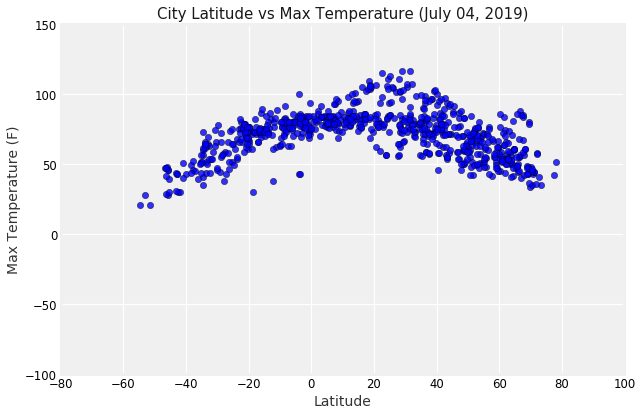

In [11]:
# Set Latitude for x axis
x_axis = df_cities["Lat"].tolist()
# Set Max Temperature for y axis
y_axis = df_cities["Max Temp"].tolist()

# Start graph
fig, ax = plt.subplots(figsize=(9,6))
fig.set_facecolor('w')

# Set x and y limits
ax.set_xlim(-80, 100)
ax.set_ylim(-100, 150)

# Set the title
ax.set_title(f"City Latitude vs Max Temperature ({analisys_date})", alpha=0.9, fontsize=15)

# Set labels
ax.set_xlabel("Latitude", alpha=0.8, fontsize=14)
ax.set_ylabel("Max Temperature (F)", alpha=0.8, fontsize=14)


ax.tick_params(direction='out', length=0, width=2, grid_color='w', labelsize='small', grid_linewidth=1.2)
ax.scatter(x_axis, y_axis, marker="o",color="blue",edgecolors='black', s=40, alpha=0.8)

# Save the Figure
plt.savefig("CityLatitude_vs_MaxTemperature.png")

# Show the Figure
plt.show()

### Latitude vs. Humidity Plot

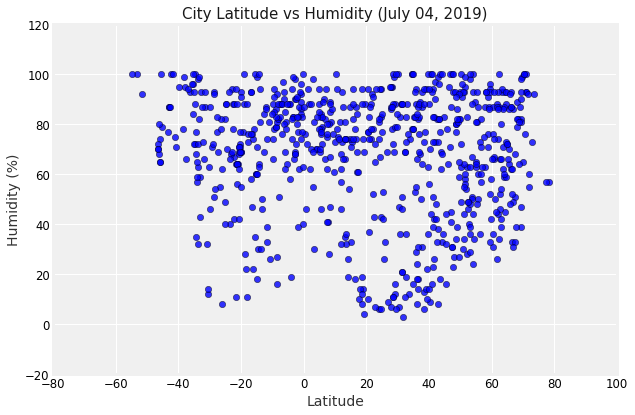

In [12]:
# Set Latitude for x axis
x_axis = df_cities["Lat"].tolist()
# Set Max Temperature for y axis
y_axis = df_cities["Humidity"].tolist()

# Start graph
fig, ax =plt.subplots(figsize=(9,6))
fig.set_facecolor('w')

# Set x and y limits
ax.set_xlim(-80, 100)
ax.set_ylim(-20, 120)
 
# Set the title
ax.set_title(f"City Latitude vs Humidity ({analisys_date})", alpha=0.9, fontsize=15)

# Set labels
ax.set_xlabel("Latitude", alpha=0.8, fontsize=14)
ax.set_ylabel("Humidity (%)", alpha=0.8, fontsize=14)

plt.style.use('fivethirtyeight')
ax.tick_params(direction='out', length=0, width=2, grid_color='w', labelsize='small', grid_linewidth=1.)
ax.scatter(x_axis, y_axis, marker="o",color="blue",edgecolors='black', s=40, alpha=0.8)

# Save the Figure
plt.savefig("CityLatitude_vs_Humidity.png")

# Show the Figure
plt.show()

### Latitude vs. Cloudiness Plot

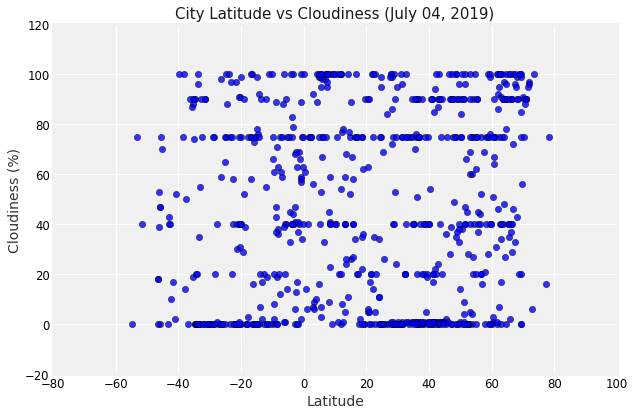

In [13]:
# Set Latitude for x axis
x_axis = df_cities["Lat"].tolist()
# Set Max Temperature for y axis
y_axis = df_cities["Cloudiness"].tolist()

# Start graph
fig, ax =plt.subplots(figsize=(9,6))
fig.set_facecolor('w')

# Set x and y limits
ax.set_xlim(-80, 100)
ax.set_ylim(-20, 120)
 
# Set the title
ax.set_title(f"City Latitude vs Cloudiness ({analisys_date})", alpha=0.9, fontsize=15)

# Set labels
ax.set_xlabel("Latitude", alpha=0.8, fontsize=14)
ax.set_ylabel("Cloudiness (%)", alpha=0.8, fontsize=14)

plt.style.use('fivethirtyeight')
ax.tick_params(direction='out', length=0, width=2, grid_color='w', labelsize='small', grid_linewidth=1.2)
ax.scatter(x_axis, y_axis, marker="o",color="blue",edgecolors='black', s=40, alpha=0.8)

# Save the Figure
plt.savefig("CityLatitude_vs_Cloudiness.png")

# Show the Figure
plt.show()


In [14]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [ ]:
# Save Cities Data.
df_cities.to_csv(cities_file, encoding="utf-8", index=False)